<h1>Machine Learning Project: Predicting Diabetes using Classification Algorithms</h1>
<p>In this project, onset of diabetes is predicted based on different diagnostics measures. The dataset used is the <a href = 'https://www.kaggle.com/uciml/pima-indians-diabetes-database'>Pima Indians Diabetes Database</a> taken from kaggle. All All the patients in the dataset are females atleast 21 years of age and of Pima Indian heritage. </p>
The different variables used in the prediction of the outcome are:
<ul>
    <li> Pregnancies: Number of times pregnant </li>
    <li> Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance</li>
    <li> Blood Pressure: Diastolic blood pressure (mmHg) </li>
    <li> Skin Thickness: Triceps skin fold thickness </li>
    <li> Insulin: 2-Hour serum insulin(mu/Uml)</li>
    <li> BMI: Body mass index (weight in kg/(height in m)^2) </li>
    <li> DiabetesPedigreeFunction: Diabetes pedigree function </li>
    <li> Age: Age (years) </li>  
 </ul>   
<p>Different classification algorithms are used in the prediction of diabetes and are evaluated based on two different evaluation metrics:
<ul>
    <li>f1-score value which is the harmonic average of both precision and recall of a model. </li>
    <li>Jaccard similarity score which shows hows close are the predicted labels to actual labels. </li>
</ul>
Precision shows percentage of values that were True out of all the values predicted. Recalls shows percentage of values that were True out of all the values that are actually True. 
<img src="diab.JPG" alt="Precision and Recall" height="400" width="400">
F1-score is the harmonic average of both Precision and recall.
<img src="diab1.JPG" alt="F1-Score" height="300" width="300">
For the best accuracy of a model both Precision and Accuracy have to be high to have a high F-1 score. 
Higher the F1-score, the better the model and higher the Jaccard similarity score, the better is the model.
The following are the machine learning classification algorithms/ models which will be used to train the data for finding the right parameters for prediction of onset of diabetes:
<ul>
    <li>Support Vector Machines</li>
    <li>K-Nearest Neighbors</li>
    <li>Decision Trees </li>
    <li>Logistic Regression </li>
</ul>
</p>


<h2> DATA WRANGLING: </h2>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [17]:
df = pd.read_csv('diabetes.csv')

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df = df.astype('float64') #Changing all the columns to float data type

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null float64
dtypes: float64(9)
memory usage: 54.1 KB


In [22]:
df.shape #We have 768 rows/ training examples and 9 feature columns

(768, 9)

In [23]:
df = df.rename(columns = {'Outcome': 'Classes'}) #Renaming the Outcome column to Classes to represent 
#which class the patient belongs to- the diabetic or non-diabetic class

In [24]:
df.describe() #Checking the statistics of the different columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Classes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2> Exploratory Analysis: </h2>

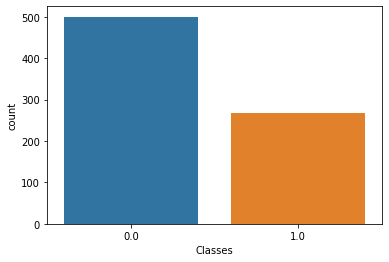

In [26]:
sns.countplot(df['Classes'])

Based on the countplot We have more non- diabetic training examples in the data set as compared to diabetic training examples.

Text(0.5, 1, 'Distribution of the Classes based on SkinThickness and BMI')

<Figure size 1080x720 with 0 Axes>

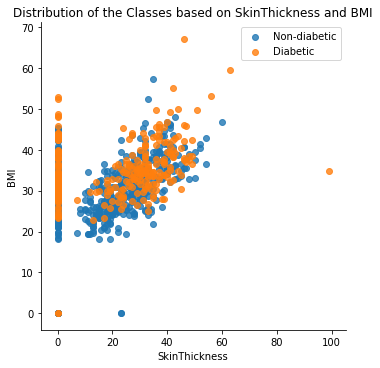

In [27]:
plt.figure(figsize = (15,10))
sns.lmplot(x='SkinThickness', y = 'BMI', hue = 'Classes', fit_reg= False, data = df, legend= False)
plt.legend(labels = ['Non-diabetic', 'Diabetic'], loc = 'upper right')
plt.title('Distribution of the Classes based on SkinThickness and BMI')

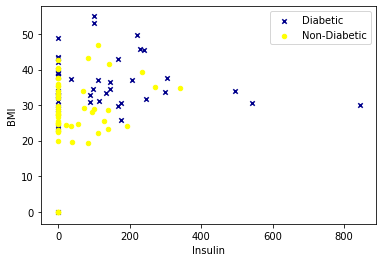

In [28]:
ax = df[df['Classes'] == 1][0:50].plot(kind='scatter', x='Insulin', y='BMI', color='DarkBlue', marker = 'x', label='Diabetic');
df[df['Classes'] == 0][0:50].plot(kind='scatter', x='Insulin', y='BMI', color='Yellow', label='Non-Diabetic', ax= ax);
plt.show()

From above plot, we can see that the diabetic patients tend to be more obese and have higher insulin levels.
The normal blood glucose level for non-diabetics is between 70-130 mg/dL. (Source = <a href= 'https://en.wikipedia.org/wiki/Blood_sugar_level'>Wikipedia Source).</a>

For good health, the body must be able to keep insulin and glucose levels in balance. With too little insulin, blood sugar remains higher than normal (a condition known as hyperglycemia) and cells can't get the energy they need. With too much insulin, blood sugar decreases (hypoglycemia), causing symptoms such as sweating, trembling, lightheadedness, and in extreme cases, shock. The most common cause of abnormal fluctuations in blood sugar is diabetes.
Source = <a href = 'https://kidshealth.org/en/parents/test-insulin.html'>Website.</a>

We can also see from plot below that most of the diabetic patients have high blood glucose level and insulin levels as in case with Type 2 diabetes where tissues become resistant to insulin. Some patients tend to have high blood sugar but low insulin level and show hypoglycemia.

<Figure size 1080x720 with 0 Axes>

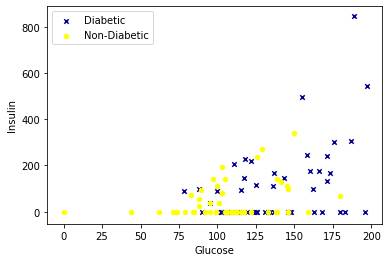

In [29]:
plt.figure(figsize=(15,10))
ax = df[df['Classes'] == 1][0:50].plot(kind='scatter', x='Glucose', y='Insulin', color='DarkBlue', marker = 'x', label='Diabetic');
df[df['Classes'] == 0][0:50].plot(kind='scatter', x='Glucose', y='Insulin', color='Yellow', label='Non-Diabetic', ax= ax);
plt.show()

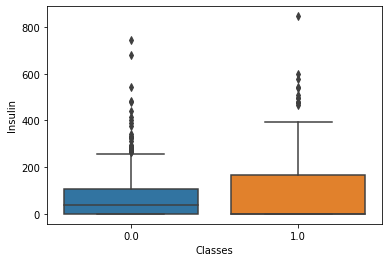

In [30]:
sns.boxplot(x = 'Classes', y = 'Insulin', data = df)

From above plot we can see that on average diabetic patients have higher insulin levels. To confirm we can group the data set by the classes and check the average for insulin levels as in code below:

In [31]:
insulin_average= df.groupby('Classes')['Insulin'].mean()
insulin_average

Classes
0.0     68.792000
1.0    100.335821
Name: Insulin, dtype: float64

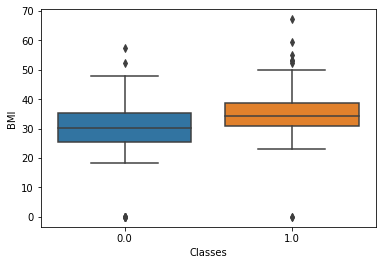

In [32]:
sns.boxplot(x = 'Classes', y = 'BMI', data = df)

Diabetic patients have higher median and mean BMI. Obese people shows to be more diabetic as the obese people tend to suffer more from insulin resistance which causes Type 2 diabetes where tissues becomes less sensitive to insulin causing the pancreas to overcomponsate and produce more insulin.

In [33]:
pd.crosstab(df.Pregnancies, df.Classes)

Classes,0.0,1.0
Pregnancies,,
0.0,73,38
1.0,106,29
2.0,84,19
3.0,48,27
4.0,45,23
5.0,36,21
6.0,34,16
7.0,20,25
8.0,16,22


From above pivot table the number of diabetic and non-diabetic patients are calculated for women with different number of preganancies. We can see that as number of pregnancies increase, the proportion of diabetic patients increases as compared to non-diabetic training examples.

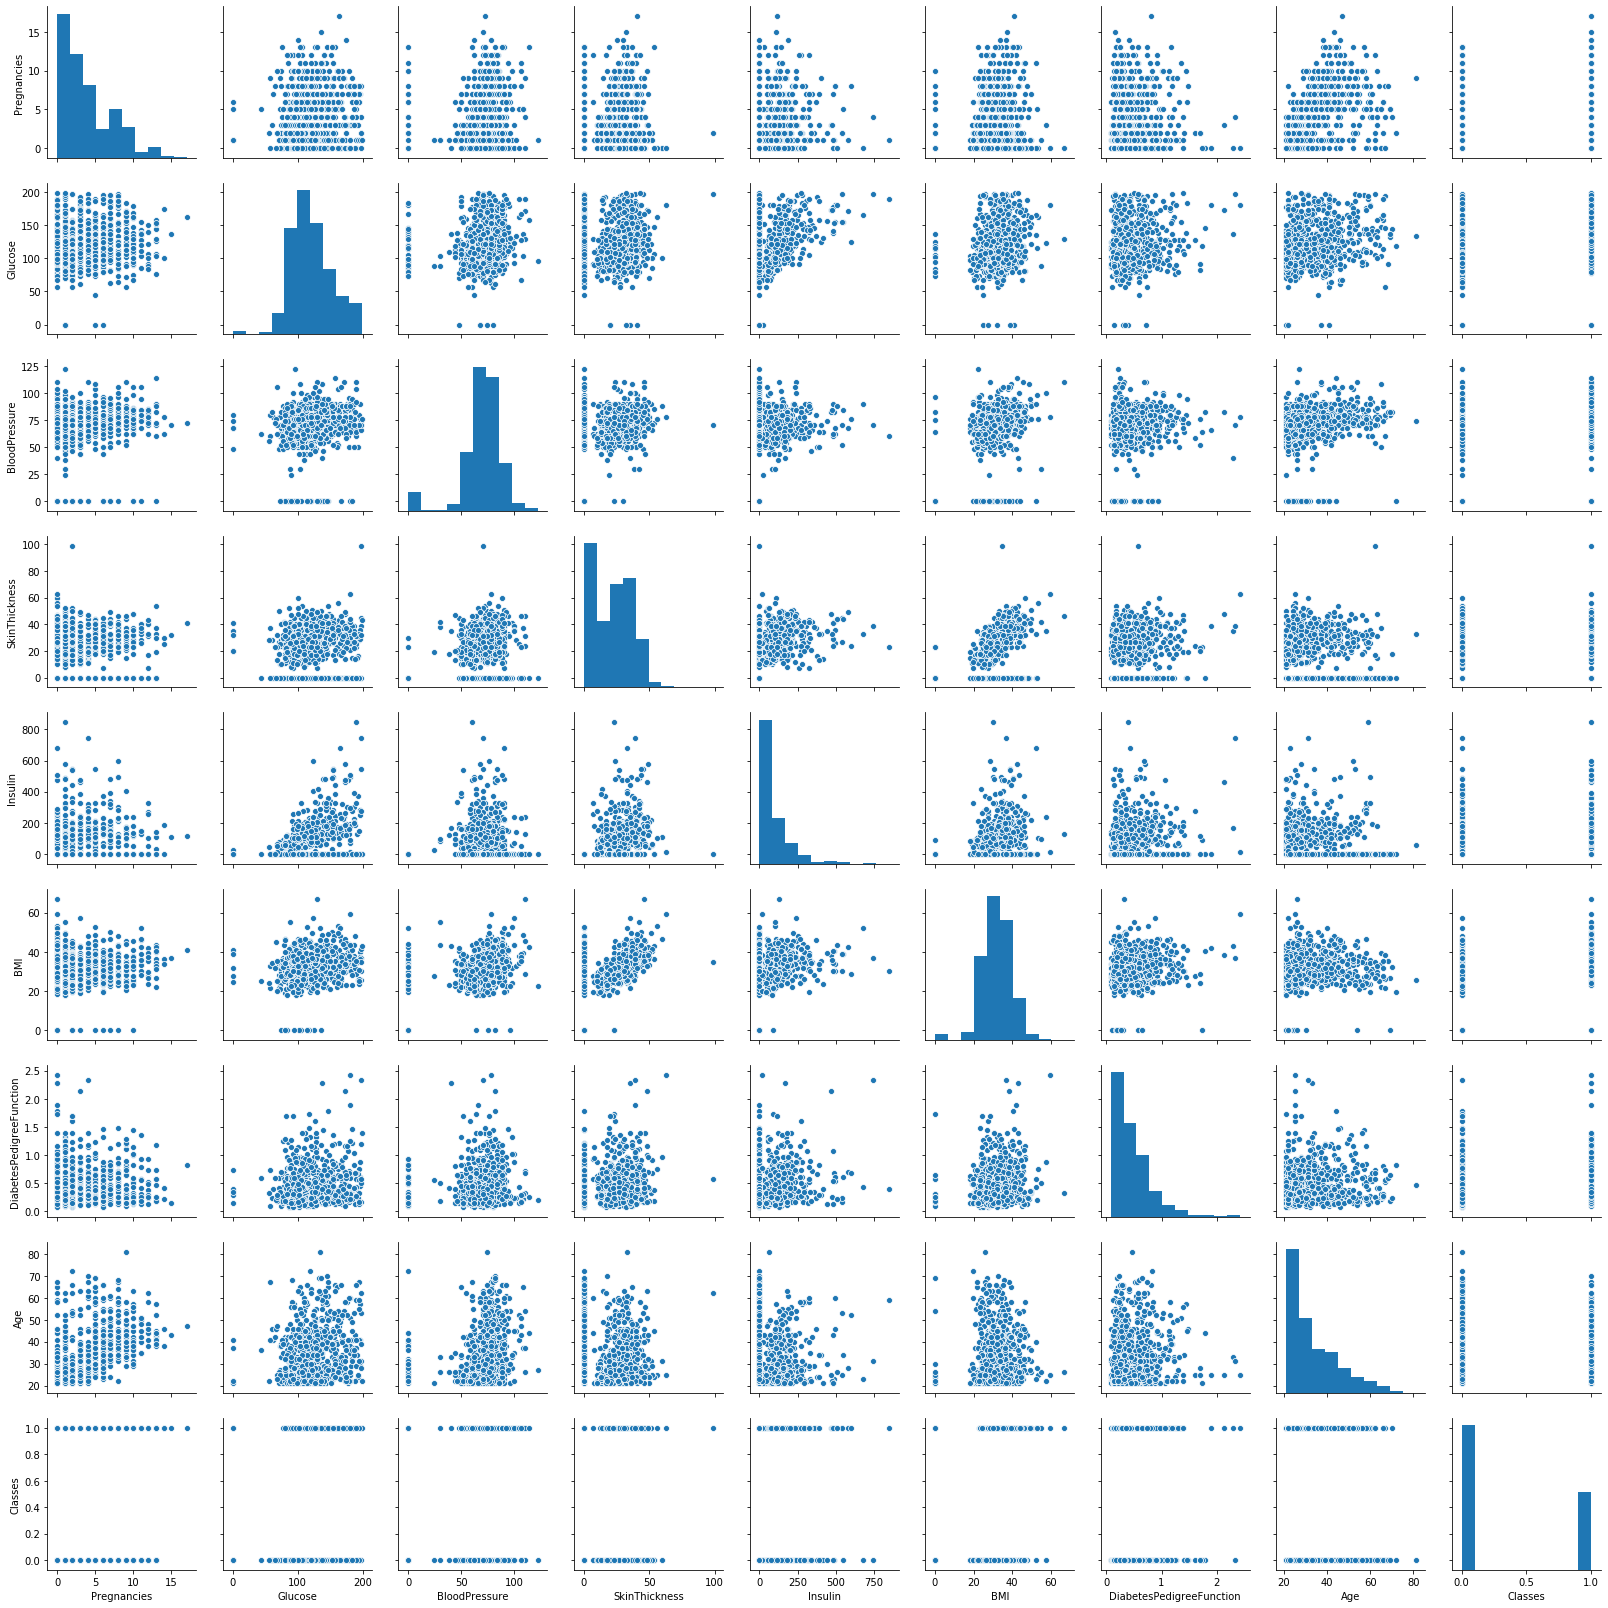

In [34]:
sns.pairplot(data = df)

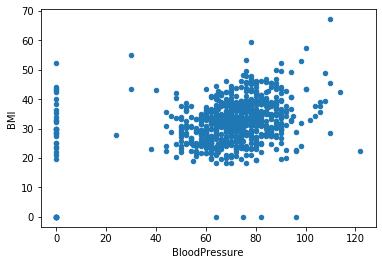

In [35]:
df.plot(kind = 'scatter', x = 'BloodPressure', y = 'BMI')
#Variation in blood pressure compared to BMI

## Predictive Analysis on the Data Set using Machine Learning Algorithms:

In [36]:
feature_df = df[['Glucose', 'BloodPressure', 'Insulin', 'Age', 'SkinThickness', 'DiabetesPedigreeFunction', 'Pregnancies', 'BMI']]

### Normalizing the Data:

In [37]:
from sklearn import preprocessing
#Normalizing the input features to have zero mean and variance 1)
X= np.asarray(feature_df)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.84832379,  0.14964075, -0.69289057,  1.4259954 ,  0.90726993,
         0.46849198,  0.63994726,  0.20401277],
       [-1.12339636, -0.16054575, -0.69289057, -0.19067191,  0.53090156,
        -0.36506078, -0.84488505, -0.68442195],
       [ 1.94372388, -0.26394125, -0.69289057, -0.10558415, -1.28821221,
         0.60439732,  1.23388019, -1.10325546],
       [-0.99820778, -0.16054575,  0.12330164, -1.04154944,  0.15453319,
        -0.92076261, -0.84488505, -0.49404308],
       [ 0.5040552 , -1.50468724,  0.76583594, -0.0204964 ,  0.90726993,
         5.4849091 , -1.14185152,  1.4097456 ]])

In [38]:
df['Classes'] = df['Classes'].astype('int')
y = np.asarray(df['Classes'])
y [0:5]

array([1, 0, 1, 0, 1])

Now we will split the data set in to training and test sets. The train set will be used to train the model and find the right paramaters whereas the test set will be used for evaluating the model.

In [39]:
#Importing important functions from sklearn library for fitting the machine learning models
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


### Support Vector Machine:
The first model that we will try to fit to our data set is support vector machine. 
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we will choose different functions in turn and compare the results.
The model is evaluated based on f1-score value which is calculated as the harmonic average of precision and recall. A Classification report is printed which is a function imported from metrics module of sklearn library. The classification report shows the precision, recall, and f1-score of each class label and the average accuracy and f1-score of the model. The confusion matrix is also printed which shows numbers of actual diabetic patients as compared to predicted diabetic patients.
An example of a confusion matrix is something like this:

<img src="diab2.JPG" alt="Confusion matrix" height="500" width="500">
</p>

In [45]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report of  linear
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       102
           1       0.72      0.65      0.69        52

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154

Confusion matrix of  linear
Confusion matrix, without normalization
[[89 13]
 [18 34]]
--------------------------------------------------------------------------------------------------------------


C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classification Report of  rbf
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       102
           1       0.67      0.62      0.64        52

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

Confusion matrix of  rbf
Confusion matrix, without normalization
[[86 16]
 [20 32]]
--------------------------------------------------------------------------------------------------------------
Classification Report of  sigmoid
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       102
           1       0.55      0.60      0.57        52

    accuracy                           0.70       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.71      0.70      0.70       154

Confusion matrix of  sigmoid
Confusion matrix, without normalization
[[77 25]
 [21 31]]

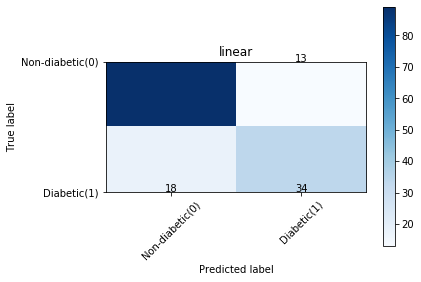

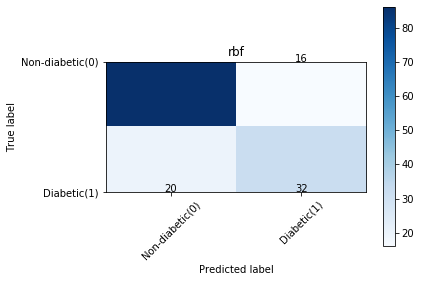

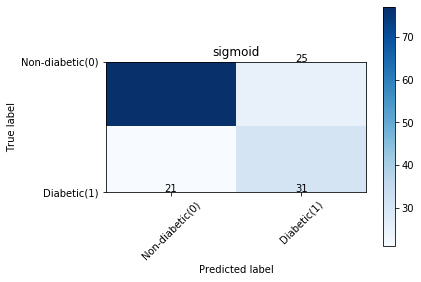

In [46]:
#Importing svm estimator function for 
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
kernels = ['linear', 'rbf', 'sigmoid']
for x in kernels:
    clf = svm.SVC(kernel=x) #Creating an SVM object with the chosen kernel
    clf.fit(X_train, y_train) #fitting the model on the training set
    yhat_svm = clf.predict(X_test) #predicting the output for test set based on the trained model
    cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[0,1]) #Confusion matrix
    np.set_printoptions(precision=2)
    print('Classification Report of ', x)
    print (classification_report(y_test, yhat_svm))
    plt.figure()
    print('Confusion matrix of ', x)
    plot_confusion_matrix(cnf_matrix, classes=['Non-diabetic(0)','Diabetic(1)'],normalize= False,  title= x)
    print('--------------------------------------------------------------------------------------------------------------')

From above results we can clearly see that linear kernel shows the best f1-score for non-diabetic and diabetic groups value with accuracy of 80%. For models with rbf and sigmoid kernel, even though the precision and recall is very high for non-diabetics, the model misclassifies a more number of diabetics as non-diabetics compared to model with linear kernel. Therefore, we will stick with the linear kernel for SVM.

Training the model with the linear kernel:

Classification Report of SVM with linear kernel
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       102
           1       0.72      0.65      0.69        52

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154

Confusion matrix of SVM with linear kernel
Confusion matrix, without normalization
[[89 13]
 [18 34]]


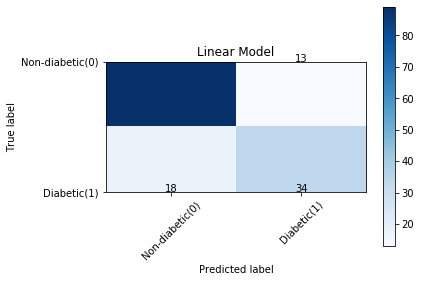

In [47]:
clf = svm.SVC(kernel='linear') #Creating an SVM object with the chosen kernel
clf.fit(X_train, y_train) #fitting the model on the training set
yhat_svm = clf.predict(X_test) #predicting the output for test set based on the trained model
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[0,1]) #Confusion matrix
np.set_printoptions(precision=2)
print('Classification Report of SVM with linear kernel')
print (classification_report(y_test, yhat_svm))
plt.figure()
print('Confusion matrix of SVM with linear kernel')
plot_confusion_matrix(cnf_matrix, classes=['Non-diabetic(0)','Diabetic(1)'],normalize= False,  title= 'Linear Model')


### K-Nearest Neighbor
The next model we will try to fit to the data set is K-Nearest Neighbor. 
K-Nearest Neighbors is an algorithm for supervised learning where the data is 'trained' with data points corresponding to their classification based on the distance between each data point with it's neighbors. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification. The mode of the 'K' nearest response labels is assigned to each data point.

In [48]:
#Importing KNeighborsClassifier estimator function to training the train set with K-Nearest Neighbors classification Algorithm
from sklearn.neighbors import KNeighborsClassifier

#### How to choose the right K?
The best k is determined by runnning a for loop with different values of k and evaluating the model on the test set by calculating the accuracy score as an evaluation metric and then choosing that k which shows the highest value of accuracy score. Accuracy score shows how closely are the actual labels and predicted labels for diabetes outcome are matched.

In [49]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat1=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat1)

    
    std_acc[n-1]=np.std(yhat1==y_test)/np.sqrt(yhat1.shape[0])

print( "The best accuracy was with %.2f" %mean_acc.max(), "with k=", mean_acc.argmax()+1) 
std_acc

The best accuracy was with 0.76 with k= 7


array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03])

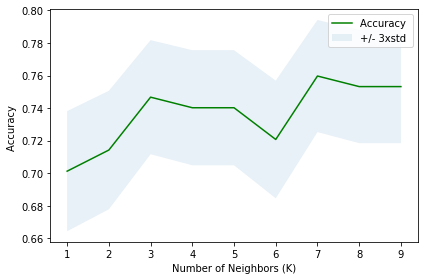

In [50]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

The highest accuracy score is obtained from k = 7. Therefore, we will use 7 nearest neighbors to train the model.

In [51]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [52]:
yhat_kneigh = neigh.predict(X_test)
yhat_kneigh[0:5]

array([1, 0, 0, 0, 0])

In [53]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_kneigh))

Test set Accuracy:  0.7597402597402597


Classification Report of K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.66      0.60      0.63        52

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154

Confusion matrix of K-Nearest Neighbor
Confusion matrix, without normalization
[[86 16]
 [21 31]]


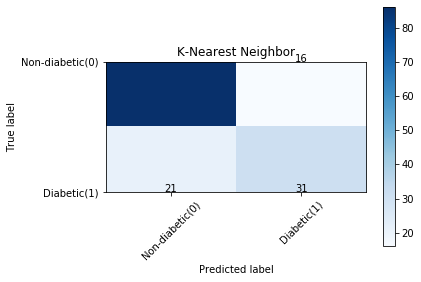

In [55]:
cnf_matrix = confusion_matrix(y_test, yhat_kneigh, labels=[0,1]) #Confusion matrix
np.set_printoptions(precision=2)
print('Classification Report of K-Nearest Neighbor')
print (classification_report(y_test, yhat_kneigh))
plt.figure()
print('Confusion matrix of K-Nearest Neighbor')
plot_confusion_matrix(cnf_matrix, classes=['Non-diabetic(0)','Diabetic(1)'],normalize= False,  title= 'K-Nearest Neighbor')

The F1-score is 76% which for the K-Nearest Neighbors model. The model seems to misclassify more training examples as compared to SVM model with linear kernel.

### Decision Tree Classification Model:
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
In decision tree model, the training example is split in to nodes which represents the features/ conditions. The branches from the nodes are the results of those features which in turn forms the leaf nodes which represents the labels for the different classes assigned to each patient. We keep splitting at each node till we get pure leafs or response labels for the classes. The training example is first split with the feature that leads to decrease in entropy or randomness and increase in information gain, i.e. the feature that will produce the purest subset or leaf from it's branches. The results yielded by the node on which the training example is first split is mostly pure.

In [56]:
#We import the estimator function DecisionTreeClassifier function
from sklearn.tree import DecisionTreeClassifier

 We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree

In [57]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
predTree = drugTree.predict(X_test)

In [60]:
#Printing the predicted output and actual output for comparison
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 0 0 1]


Computing the accuracy score and printing the classification report and confusion matrix for the Decision tree model.

In [61]:
print("DecisionTrees's Accuracy: %.2f" %metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy: 0.78


Classification Report of Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       102
           1       0.66      0.73      0.69        52

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154

Confusion matrix of Decision Tree
Confusion matrix, without normalization
[[82 20]
 [14 38]]


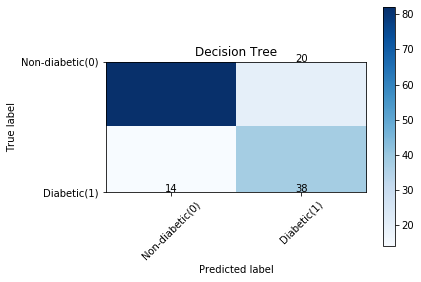

In [68]:
cnf_matrix = confusion_matrix(y_test, predTree, labels=[0,1]) #Confusion matrix
np.set_printoptions(precision=2)
print('Classification Report of Decision Tree')
print (classification_report(y_test, predTree))
plt.figure()
print('Confusion matrix of Decision Tree')
plot_confusion_matrix(cnf_matrix, classes=['Non-diabetic(0)','Diabetic(1)'],normalize= False,  title= 'Decision Tree')

The F1-score for decision tree model is better than K-Nearest neighbor and is comparable to the linear model. The linear model gives a slightly better F1-score value than decision tree model.

### Logistic Regression:
In Linear Regression, we predict the output of a continuous dependent variable y based on different predictor variables that are the independent variables by finding the appropriate parameters associated with each variable.
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
where 0 (theta) are the parameters associated with each variable.
The hypothesis function for a Linear Regression model can be written in vectorized form as:
$$
ℎ_\theta(𝑥) = \theta^TX
$$
In Logistic regression, however, the linear regression model is transformed in to a S- shaped sigmoid function which takes in the input paramter: $$ \theta^TX $$ and predicts the probability of each training example being classified as a positive label (y = 1). The sigmoid function is represented as:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$
We will build our model using LogisticRegression from Scikit-learn package. The logistic regression functions uses different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. We will start with liblinear optimizer to fit the model to the data set.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. 

In [63]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
yhat_log = LR.predict(X_test)
yhat_log

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [65]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66, 0.34],
       [0.74, 0.26],
       [0.75, 0.25],
       [0.54, 0.46],
       [0.64, 0.36],
       [0.31, 0.69],
       [0.48, 0.52],
       [0.48, 0.52],
       [0.21, 0.79],
       [0.66, 0.34],
       [0.47, 0.53],
       [0.8 , 0.2 ],
       [0.64, 0.36],
       [0.8 , 0.2 ],
       [0.72, 0.28],
       [0.42, 0.58],
       [0.24, 0.76],
       [0.22, 0.78],
       [0.82, 0.18],
       [0.8 , 0.2 ],
       [0.73, 0.27],
       [0.4 , 0.6 ],
       [0.6 , 0.4 ],
       [0.3 , 0.7 ],
       [0.68, 0.32],
       [0.58, 0.42],
       [0.76, 0.24],
       [0.51, 0.49],
       [0.62, 0.38],
       [0.67, 0.33],
       [0.34, 0.66],
       [0.8 , 0.2 ],
       [0.6 , 0.4 ],
       [0.81, 0.19],
       [0.41, 0.59],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.43, 0.57],
       [0.72, 0.28],
       [0.42, 0.58],
       [0.4 , 0.6 ],
       [0.62, 0.38],
       [0.65, 0.35],
       [0.34, 0.66],
       [0.72, 0.28],
       [0.73, 0.27],
       [0.58, 0.42],
       [0.25,

__predict_proba__ is used to calculate the cost/error of the model using the log_loss function from sklearn package. We want the cost to be as low as possible.

In [66]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5177367118020171

Classification Report of Logistic Regression Algorithm with liblinear optimizer
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.67      0.65      0.66        52

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion matrix of Logistic Regression Algorithm with liblinear optimizer
Confusion matrix, without normalization
[[85 17]
 [18 34]]


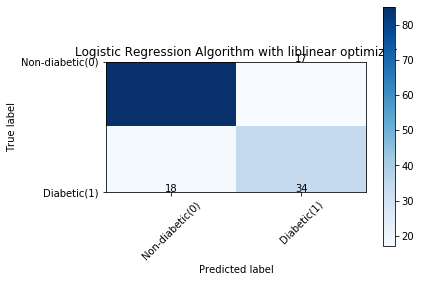

In [70]:
cnf_matrix = confusion_matrix(y_test, yhat_log, labels=[0,1]) #Confusion matrix
np.set_printoptions(precision=2)
print('Classification Report of Logistic Regression Algorithm with liblinear optimizer')
print (classification_report(y_test, yhat_log))
plt.figure()
print('Confusion matrix of Logistic Regression Algorithm with liblinear optimizer')
plot_confusion_matrix(cnf_matrix, classes=['Non-diabetic(0)','Diabetic(1)'],normalize= False,  title= 'Logistic Regression Algorithm with liblinear optimizer')

We can evaluate different optimizers to find out which one gives the lowest cost and use that for the prediction of response varible.

In [71]:
optimc = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for x in optimc:
    LR = LogisticRegression(C=0.01, solver=x).fit(X_train,y_train)
    yhat_log_ = LR.predict(X_test)
    yhat_prob_ = LR.predict_proba(X_test)
    print(x, ': ', log_loss(y_test, yhat_prob_))

newton-cg :  0.49951705357609044
lbfgs :  0.49951655871097944
liblinear :  0.5177367118020171
sag :  0.49951447247969333
saga :  0.4995179706696506


From above for loop it seems like saga optimizer has the lowest cost. We will use this optimizer for fitting the logistic regression model.

In [72]:
LR = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
yhat_log_saga = LR.predict(X_test)

Classification Report of Logistic Regression with saga
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       102
           1       0.81      0.56      0.66        52

    accuracy                           0.81       154
   macro avg       0.81      0.74      0.76       154
weighted avg       0.81      0.81      0.79       154

Confusion matrix of Logistic Regression with saga
Confusion matrix, without normalization
[[95  7]
 [23 29]]


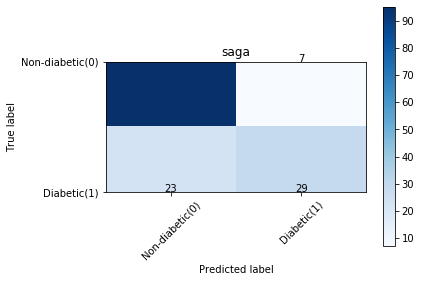

In [74]:
cnf_matrix = confusion_matrix(y_test, yhat_log_saga, labels=[0,1]) #Confusion matrix
np.set_printoptions(precision=2)
print('Classification Report of Logistic Regression with', x)
print (classification_report(y_test, yhat_log_saga))
plt.figure()
print('Confusion matrix of Logistic Regression with', x)
plot_confusion_matrix(cnf_matrix, classes=['Non-diabetic(0)','Diabetic(1)'],normalize= False,  title= x)

The F1-score for the Logistic regression model with saga optimizer gives a better F1-score value which 81% and it is also the highest f1-score value compared to the rest of the models used.

### Evaluation of different Machine Learning Classification algorithms used to train the data:
We will use F1-score and Jaccard similarity index for the models used to conclude the best machine learning model to be used to fit the data set for predicting the onset of diabetes.

Jaccard Similarity Score for Support Vector Machine:

In [112]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_svm)

C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7987012987012987

Jaccard Similarity score for K-Nearest Neighbor model:

In [113]:
jaccard_similarity_score(y_test, yhat_kneigh)

C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7597402597402597

Jaccard Similarity score for Decision Tree Classifier:

In [114]:
jaccard_similarity_score(y_test, predTree)

C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7792207792207793

Jaccard Similarity score for Logistic Regression classifier:

In [115]:
jaccard_similarity_score(y_test, yhat_log_saga)

C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8051948051948052

Next, the F1-score will be evaluated for each model using the f1-score function from the metrics module of the sklearn package.
F1-score for Support Vector Machine Model:

In [116]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_svm, average='weighted') 

0.7960258773655902

F1-score of K-Nearest Neighbor:

In [117]:
f1_score(y_test, yhat_kneigh, average='weighted') 

0.7565470149202206

F1-score of Decision Tree Classifier:

In [118]:
f1_score(y_test, predTree, average='weighted') 

0.7818968909878

F1-Score of Logistic Regression classifier with Saga optimizer:

In [120]:
f1_score(y_test, yhat_log_saga, average='weighted') 

0.7945690672963401

### Results:
<img src="diab_result.JPG" alt="Regression results">


### Conclusion:
From the results we make following conclusions:
1. For SVM, the best kernel to be used is the linear kernel.
2. For K-Nearest neighbors classifier, the best value of k to be used is 7 nearest neighbors that gives the highest accuracy in the test set.
3. For Logistic Regression classifier, the best optimizer to be used that gives the lowest cost or error in the model is saga.
4. Both SVM and Logistic Regression models performs better than K-Nearest and Decision tree classifier in predicting the right labels and gives higher F1-score and Jaccard Similarity score values and can be promising models for predicting future outcomes.